# GRIPOCTOBER22
### Author: Sahaya Jefrin M
## Task-3 : Exploratory Data Analysis - Retail (Beginner)
## INTRODUCTION
Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.EDA is an important first step in any data analysis.Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

## OBJECTIVE
* To perform exploratory data analysis for the data 'SampleSuperStore'

* To find out the weak areas where profit can be made.

* To derive the business problems by exploring the data

## DATA DESCRIPTION

The data describes the supplies of a particular store at the United States distributed across every state, city and region of the country.

* Ship Mode: Mode of transportation ( Second class, Standard class, First class and same day)

* Segment: Consumer, Corporate and Home Office

* Country : United States

* City

* State

* Region

* Category : the categories that are supplied(Furniture, Office supplies and Technology)

* Sub-category: Various things under the each of the above mentioned categories.

* Sales: Amount of sales

* Quantity: Quantity supplied

* Discount: Discount given

* Profit: Profit earned.

## EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("/Users/sahayajefrin/Downloads/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 1. NON-GRAPHICAL ANALYSIS
### Getting the data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
del(df['Postal Code'])

## Splitting Categorical variable and Numerical Variable.

In [5]:
cat = [] # defining list
num = []
for i in df.columns:
    if df[i].dtypes=='O': # it will help to separate the categorical variable from the data set.
            cat.append(i) #append() will place new items in the available space that it will place variable in given list at end.
    else:
        num.append(i)
print('The numerical columns are',num)
print('The catagorical columns are',cat)

The numerical columns are ['Sales', 'Quantity', 'Discount', 'Profit']
The catagorical columns are ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


## Numerical data description

In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Checking for null values

In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

From the above table, there is No null values so data imputation is not required

## 2. GRAPHICAL ANALYSIS

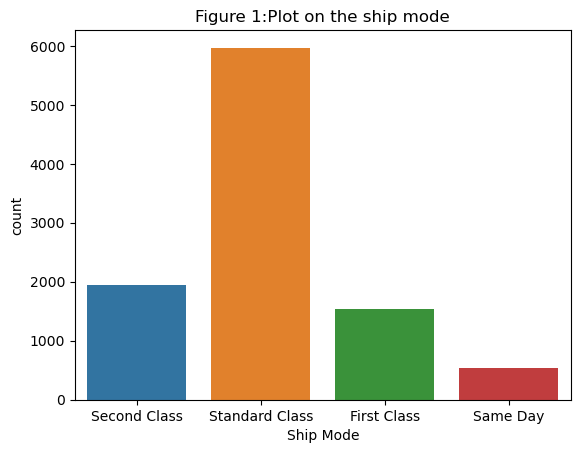

In [8]:
sns.countplot(x='Ship Mode',data=df)
plt.title("Figure 1:Plot on the ship mode")
plt.show()

The standard class mode of transportation is more compared to all the other shipping modes.

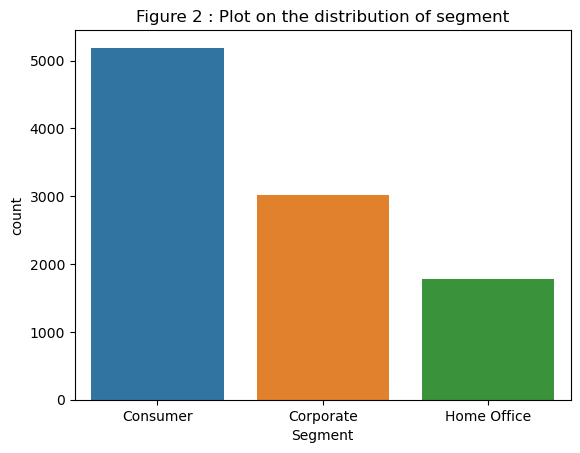

In [9]:
sns.countplot(x='Segment',data=df)
plt.title("Figure 2 : Plot on the distribution of segment")
plt.show()

The supply of counsumer goods is more than the supply of goods for corporate and home office purpose.

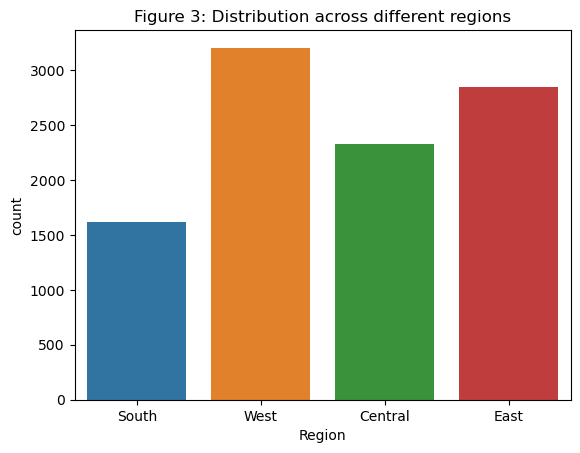

In [10]:
sns.countplot(x='Region',data=df)
plt.title("Figure 3: Distribution across different regions")
plt.show()

Compared to the South region the other three regions have an equal amount of supply of good. Improvements can be made to increase sales and profit in the South.

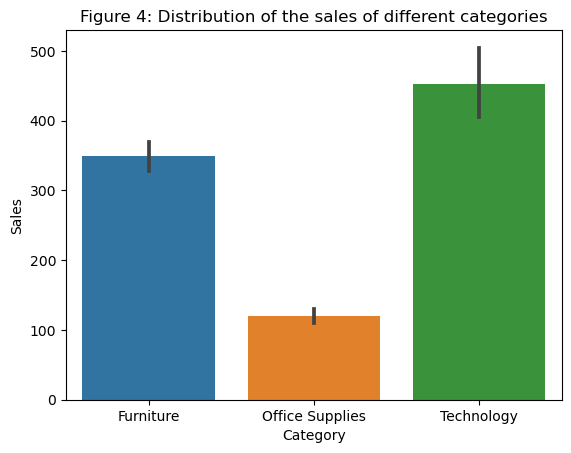

In [11]:
sns.barplot(df['Category'],df['Sales'])
plt.title("Figure 4: Distribution of the sales of different categories")
plt.show()

The above graph represents x-axis as the categories that are supplied(Furniture, Office suplies and Technology) by the store and the y-axis depicts their respective sales. Here we see that the suupllies on technology has higher number of sales followd by furniture and office supplies.

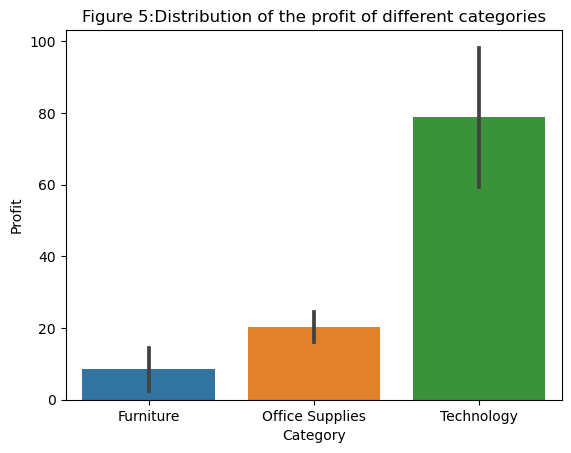

In [12]:
sns.barplot(df['Category'],df['Profit'])
plt.title("Figure 5:Distribution of the profit of different categories")
plt.show()

The above graph represents x-axis as the categories that are supplied(Furniture, Office suplies and Technology) by the store and the y-axis depicts their respective profit. Here we see that the suuplies on technology has have higher profits followed by office supplies and furniture.

## Furthur distribution of the categories.
#### FURNITURE
The store supplies bookcases, chairs, tables and furnishings under the furniture section of the store. Here, we will be analysing the distribution of sales, profit, discount and quantity supplied and furthur their impact on the store's profit.

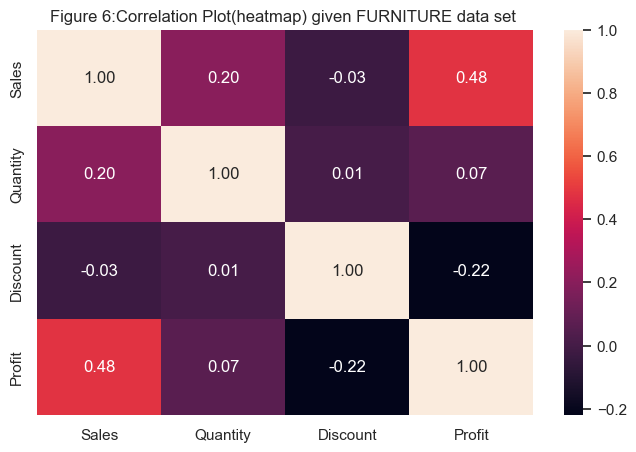

In [17]:
df1=df.loc[df['Category']=='Furniture']
plt.title("Figure 6:Correlation Plot(heatmap) given FURNITURE data set ")
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

The heatmap depicts the correlation that exists between profit, sales, quantity and discount for the supplies of furnitures. We see that profit and sales have positive correlation( 0.48 ~ 0.5) stating that as sales increase profits for furnitures also increase whereas the other factors do not have much correlation between the other factors but between discount and profit there is a small negative correlation that exists, discounts might decrease the profits.

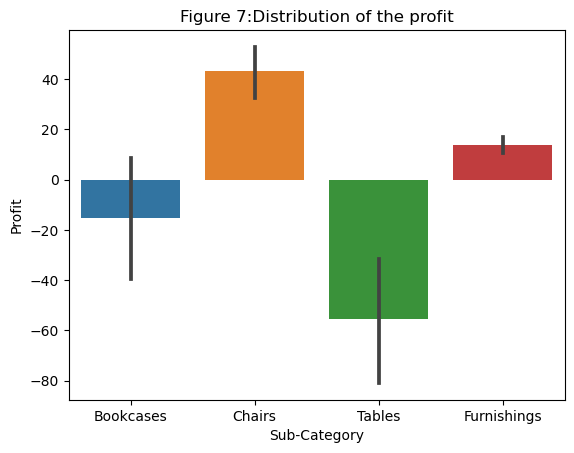

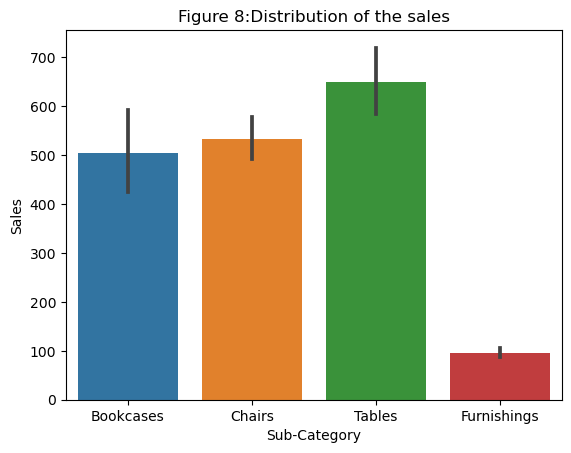

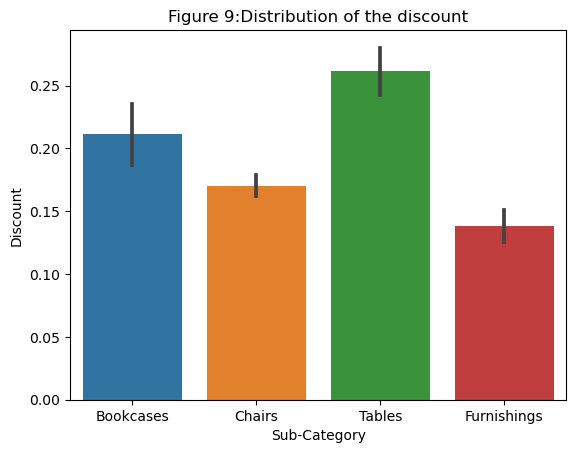

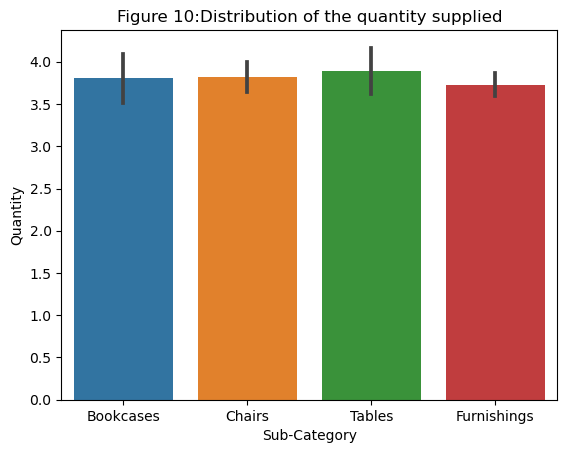

In [14]:
sns.barplot(df1['Sub-Category'],df1['Profit'])
plt.title("Figure 7:Distribution of the profit")
plt.show()
sns.barplot(df1['Sub-Category'],df1['Sales'])
plt.title("Figure 8:Distribution of the sales")
plt.show()
sns.barplot(df1['Sub-Category'],df1['Discount'])
plt.title("Figure 9:Distribution of the discount")
plt.show()
sns.barplot(df1['Sub-Category'],df1['Quantity'])
plt.title("Figure 10:Distribution of the quantity supplied")
plt.show()

## INTERPRETATION FOR THE ABOVE GRAPHS
#### Graph 1: Furnitures sub-categories vs Profit
* Profits from supplies on bookcases and tables have a negative profit (loss).
* Profits from supplies on chairs and furnishings have a positive impact on the store's profits.
* Comparatively, tables have a huge negative impact on the store's profits and chairs supplies have a reasonable postive impact on profits.

#### Graph 2: Furnitures sub-categories vs Sales
* Sale of tables is higher followed by chairs, bookcases and furnishings.
* Sale of furnishings is very low compared to all the other categories.

#### Graph 3: Furnitures sub-categories vs Discount
* Discounts given for tables is high followed by bookcases, chairs and furnishings.

#### Graph 4: Furnitures sub-categories vs Quantity
* The quantity supplied for all the sub categories are comparatively equal.


## OFFICE SUPPLIES
The store supplies labels, storage, art, Binders, appliances, paper, envelopes, fastners and supplies under the office supplies section of the store. Here, we will be analysing the distribution of sales, profit, discount and quantity supplied and furthur their impact on the store's profit.

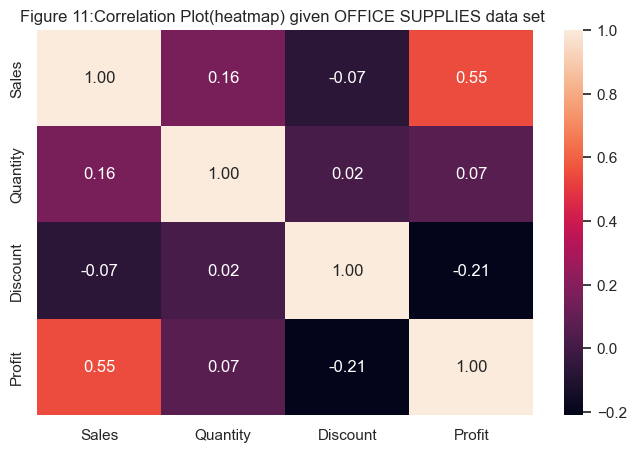

In [19]:
df2=df.loc[df['Category']=='Office Supplies']
plt.title("Figure 11:Correlation Plot(heatmap) given OFFICE SUPPLIES data set ")
sns.heatmap(df2.corr(), annot=True, fmt='.2f')
plt.show()

The heatmap depicts the correlation that exists between profit, sales, quantity and discount for the office supplies. We see that profit and sales have positive correlation(0.5) stating that as sales increase profits for office supplies also increase whereas the other factors do not have much correlation between the other factors but between discount and profit there is a small negative correlation that exists, discounts might decrease the profits.

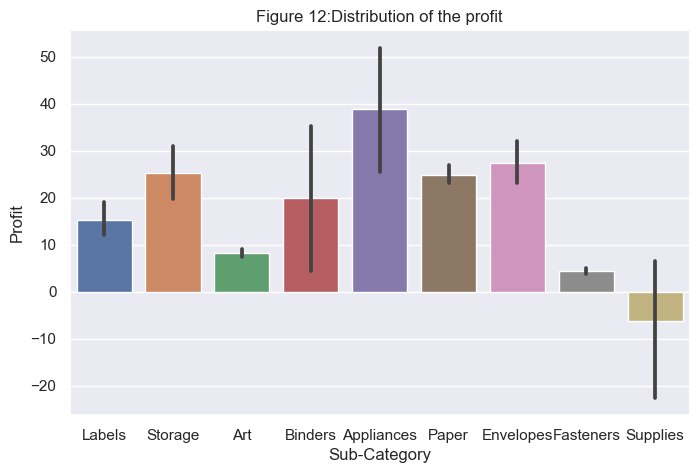

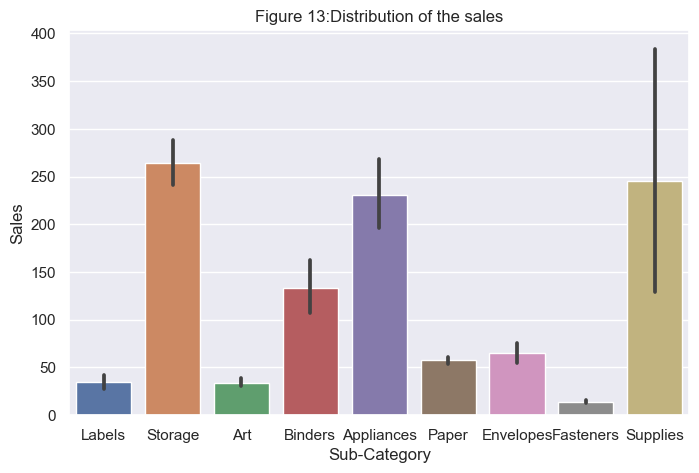

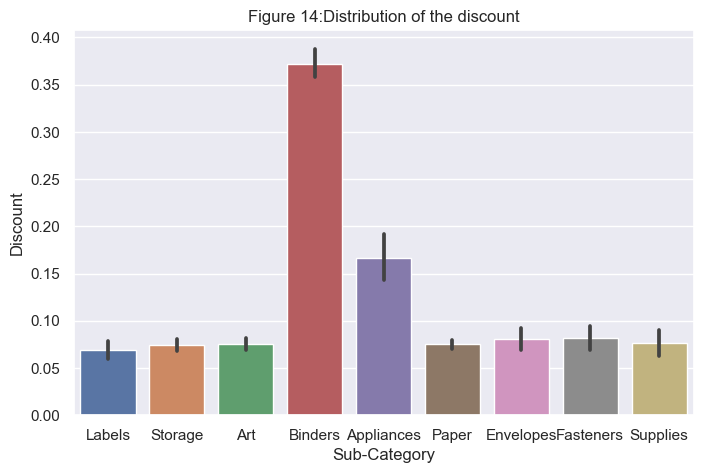

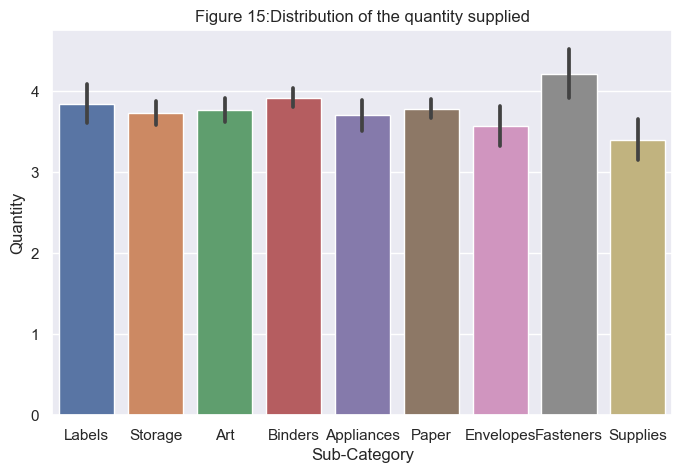

In [20]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(df2['Sub-Category'],df2['Profit'])
plt.title("Figure 12:Distribution of the profit")
plt.show()
sns.barplot(df2['Sub-Category'],df2['Sales'])
plt.title("Figure 13:Distribution of the sales")
plt.show()
sns.barplot(df2['Sub-Category'],df2['Discount'])
plt.title("Figure 14:Distribution of the discount")
plt.show()
sns.barplot(df2['Sub-Category'],df2['Quantity'])
plt.title("Figure 15:Distribution of the quantity supplied")
plt.show()

## INTERPRETATION FOR THE ABOVE GRAPHS
#### Graph 1: Office supplies sub-categories vs Profit
* Profits from supplies on miscellaneous supplies have a negative impact on profit (loss).
* Comparatively, appliances have a huge positive impact on the store's profits followed by supplies on storage, envelopes, paper, binders,lables, art and fasteners.

#### Graph 2: Office supplies sub-categories vs Sales
* Sale of storage supplies is higher followed by supplies, appliances and binders.
* Sale of all the other factors are comparatively low.

#### Graph 3: Office supplies sub-categories vs Discount
* Discounts given for binders is high compared to all.

#### Graph 4: Office supplies sub-categories vs Quantity
* The quantity supplied for all the sub categories are comparatively equal.

## TECHNOLOGY
The store supplies phones, accessories, machines and copiers under the technology supplies section of the store. Here, we will be analysing the distribution of sales, profit, discount and quantity supplied and furthur their impact on the store's profit.

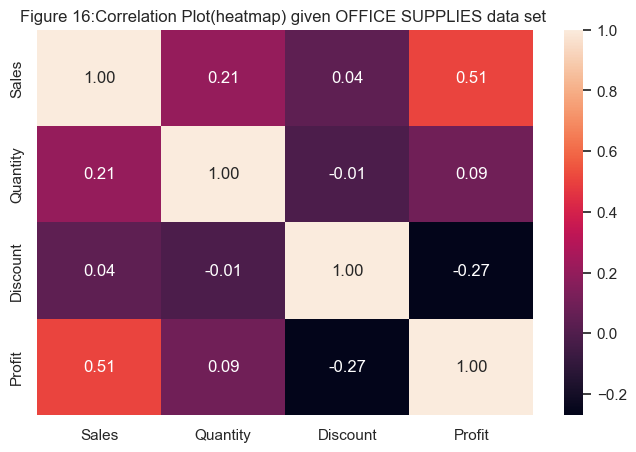

In [23]:
df3=df.loc[df['Category']=='Technology']
sns.heatmap(df3.corr(), annot=True, fmt='.2f')
plt.title("Figure 16:Correlation Plot(heatmap) given OFFICE SUPPLIES data set ")
plt.show()

The heatmap depicts the correlation that exists between profit, sales, quantity and discount for the technology supplies. We see that profit and sales have positive correlation(0.5) stating that as sales increase profits for office supplies also increase whereas the other factors do not have much correlation between the other factors but between discount and profit there is a small negative correlation that exists, discounts might decrease the profits.

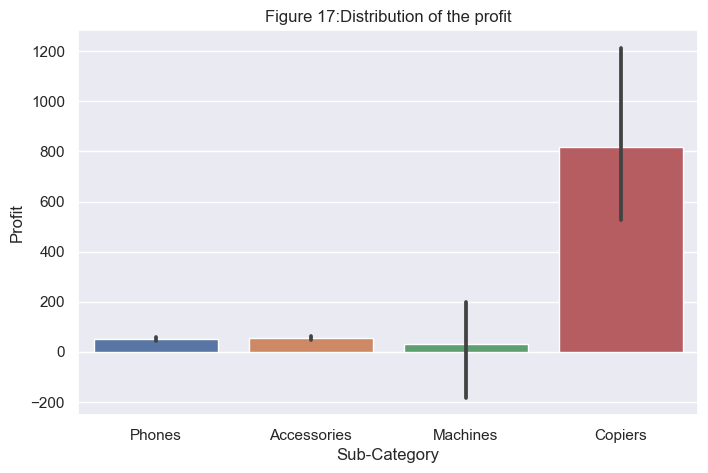

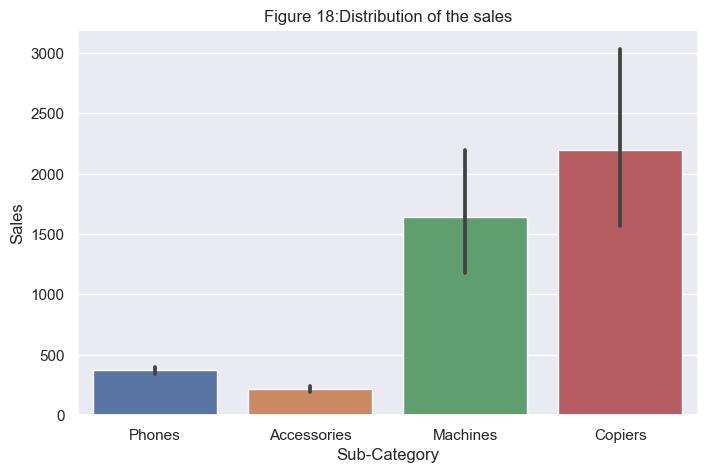

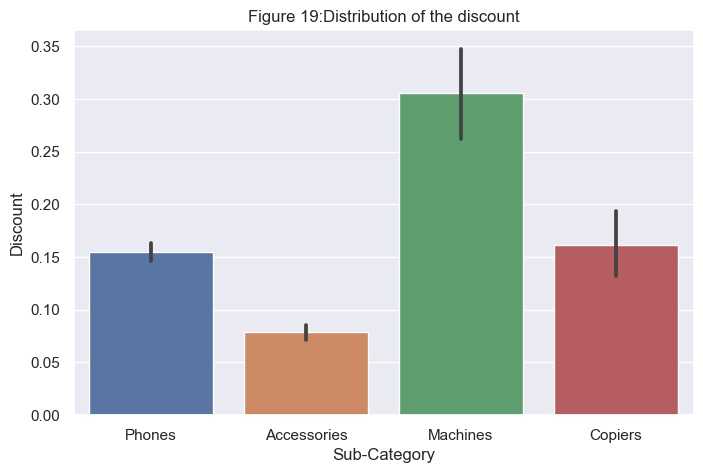

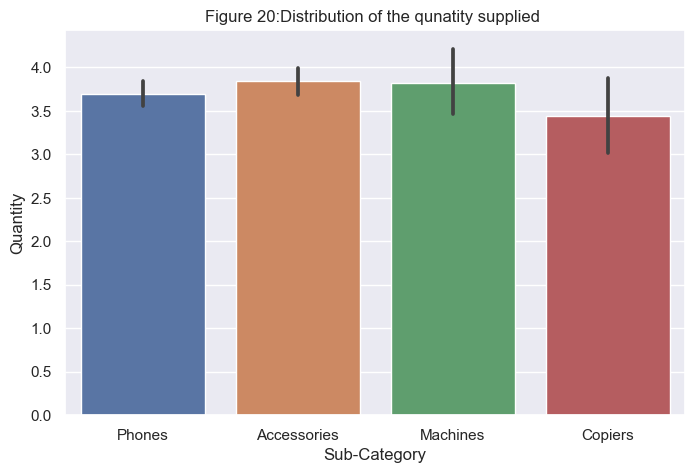

In [24]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(df3['Sub-Category'],df3['Profit'])
plt.title("Figure 17:Distribution of the profit")
plt.show()
sns.barplot(df3['Sub-Category'],df3['Sales'])
plt.title("Figure 18:Distribution of the sales")
plt.show()
sns.barplot(df3['Sub-Category'],df3['Discount'])
plt.title("Figure 19:Distribution of the discount")
plt.show()
sns.barplot(df3['Sub-Category'],df3['Quantity'])
plt.title("Figure 20:Distribution of the qunatity supplied ")
plt.show()

## INTERPRETATION FOR THE ABOVE GRAPHS
#### Graph 1: Technology sub-categories vs Profit
* Profits from supplies on copiers have a higher positive impact on profit.
* All the other factors have a very low positive impact which is negligible.

#### Graph 2: Technology sub-categories vs Sales
* Sale of copiers supplies is higher followed by machine supplies.
* Sale of all the other factors are comparatively low.

#### Graph 3: Technology sub-categories vs Discount
* Discounts given for machines is high compared to all.

#### Graph 4: Technology sub-categories vs Quantity
* The quantity supplied for all the sub categories are comparatively equal.

## CONCLUSION

#### Suggestions to increase profit

From the above analysis we find that the distribution of the store among different cities, states and regions of the United States definitely has a great impact on the future prospectives

Analysing the categories and sub- categories of the supplies supplied by the store it is seen that supplies on technology have an increased profit compared to furnitures and office supplies. There can be certain improvements or modifications that can be done on each category and their respective sub category in order to increase profit.

###### For Furnitures.

* It is seen that sale of tables and discounts given to them are very high but the profits earned from table supply is negative.

* The store can try to reduce(or remove, if there are is no demand for it in the market) its investement on tables and substitute it with chairs and furnishings.

* Though the sale and discounts given for furnishings and chairs is low compared to that of tables their profits are higher compared to that of tables.

* Improvements can be done in the supply of bookcases as there are chances of increasing the profit.

###### For office supplies

* The store can try to swap its investment from miscellaneous supplies and storage supplies to appliances.
* As miscellaneous supplies have negative profit and storage has negligibel profit but their sales are too high.
* Reduce its discounts on binders as discounts are having a negative impact on profit.

The store is performing well in the supply of technology and can continue the same to have much more profits.

## Business problems
1. Demand

The store has to regulate itself with the changing demands of the consumer.

2. Efficiency

Low output for a unit of input

3. Branding

No proper branding recognition for some of its best products.